# Trying to improve the model modifying the bright of an image

In [1]:
import numpy as np
import cv2
from glob import glob
import matplotlib.pyplot as plt

IMG_SIZE = 150

In [2]:
def add_bright(image, brightness, contrast=0):
    image = np.int16(image)
    image = image * (contrast / 127 + 1) - contrast + brightness
    image = np.clip(image, 0, 255)
    return np.uint8(image)

In [3]:
def plot_images(pn_image, no_image):
    fig = plt.figure(figsize=(8, 8))
    fig.add_subplot(1, 2, 1)
    #plt.title('Pneumonia image')
    plt.imshow(pn_image)
    
    fig.add_subplot(1, 2, 2)
    plt.imshow(no_image)
    #plt.title('Normal image')
    
    plt.show()

In [4]:
pneumonia_path = '../../Datasets/chest_xray/train/PNEUMONIA/*.jpg'
normal_path = '../../Datasets/chest_xray/train/NORMAL/*.jpg'

In [5]:
pneumonia_files = glob(pneumonia_path)
normal_files = glob(normal_path)

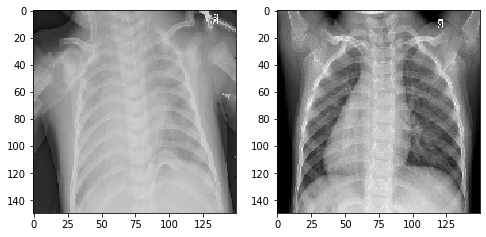

In [6]:
pn_image = cv2.imread(pneumonia_files[100])
no_image = cv2.imread(normal_files[0])

pn_image = cv2.resize(pn_image, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_CUBIC)
no_image = cv2.resize(no_image, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_CUBIC)

plot_images(pn_image, no_image)

### Add the brightness

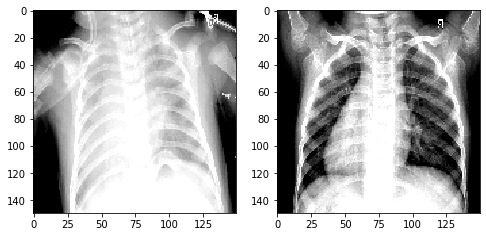

In [7]:
pn_image_modified = add_bright(pn_image, 0, 127)
no_image_modified = add_bright(no_image, 0, 127)

plot_images(pn_image_modified, no_image_modified)

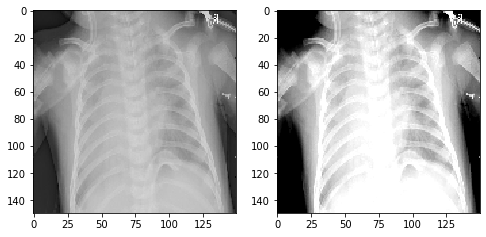

In [8]:
plot_images(pn_image, pn_image_modified)